<a href="https://colab.research.google.com/github/DrAlexSanz/NLP-SPEC-C2/blob/master/W4/Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 4: Word Embeddings
Welcome to the fourth (and last) programming assignment of Course 2!

In this assignment, you will practice how to compute word embeddings and use them for sentiment analysis.

* To implement sentiment analysis, you can go beyond counting the number of positive words and negative words.
* You can find a way to represent each word numerically, by a vector.
* The vector could then represent syntactic (i.e. parts of speech) and semantic (i.e. meaning) structures.
* In this assignment, you will explore a classic way of generating word embeddings or representations.

You will implement a famous model called the continuous bag of words (CBOW) model.
By completing this assignment you will:

* Train word vectors from scratch.
* Learn how to create batches of data.
* Understand how backpropagation works.
* Plot and visualize your learned word vectors.

Knowing how to train these models will give you a better understanding of word vectors, which are building blocks to many applications in natural language processing.

1. The Continuous bag of words model
Let's take a look at the following sentence:

'I am happy because I am learning'.

In continuous bag of words (CBOW) modeling, we try to predict the center word given a few context words (the words around the center word).

For example, if you were to choose a context half-size of say $C = 2$, then you would try to predict the word happy given the context that includes 2 words before and 2 words after the center word:

$C$ words before: [I, am]

$C$ words after: [because, I]

In other words:
$$context = [I,am, because, I]$$

$$target = happy$$

The structure of your model will look like this:

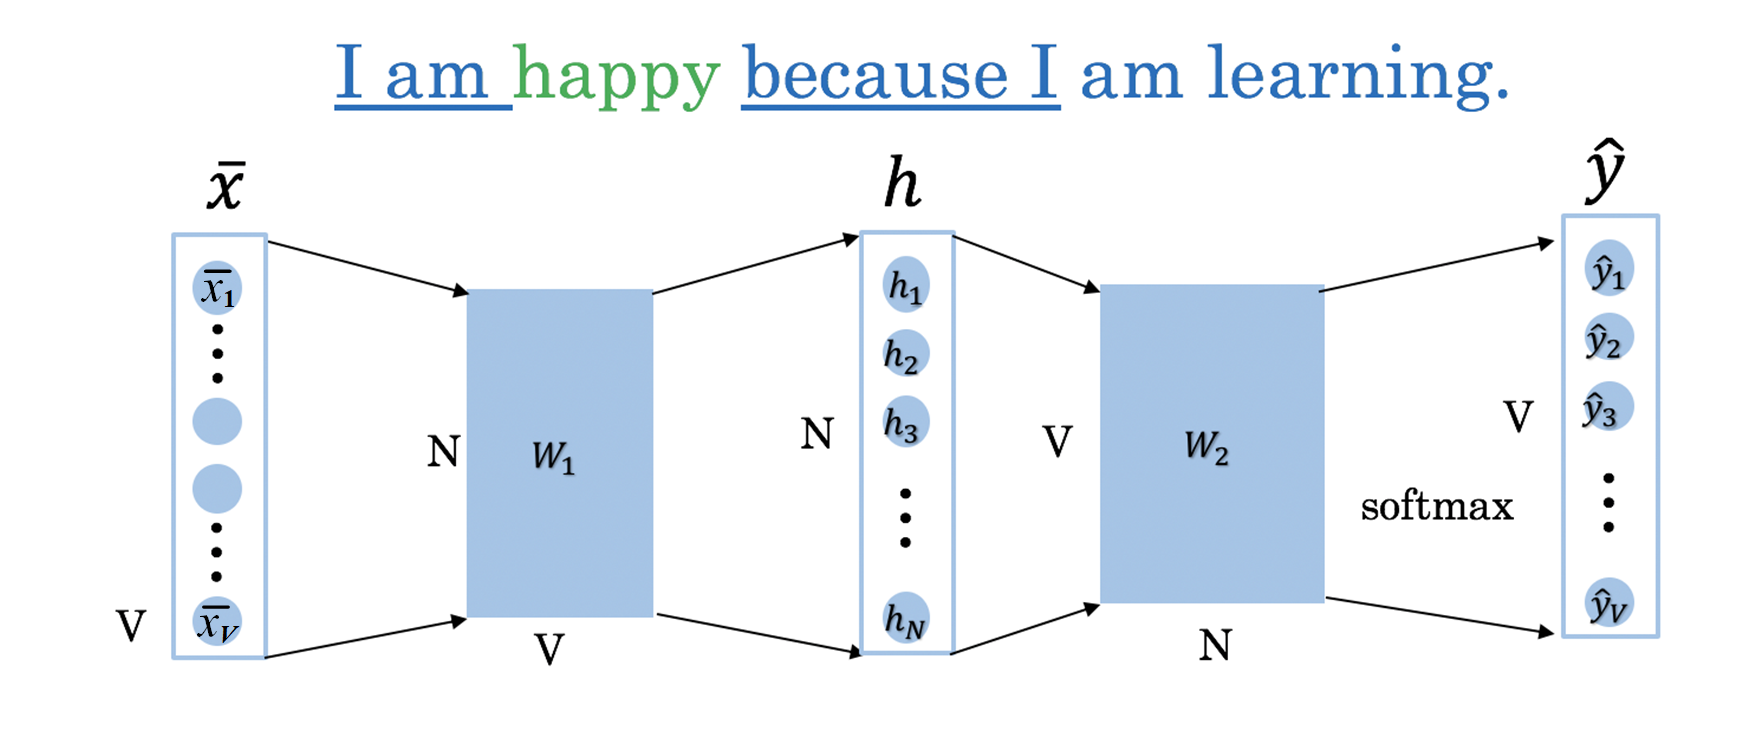

Figure 1
Where $\bar x$ is the average of all the one hot vectors of the context words.

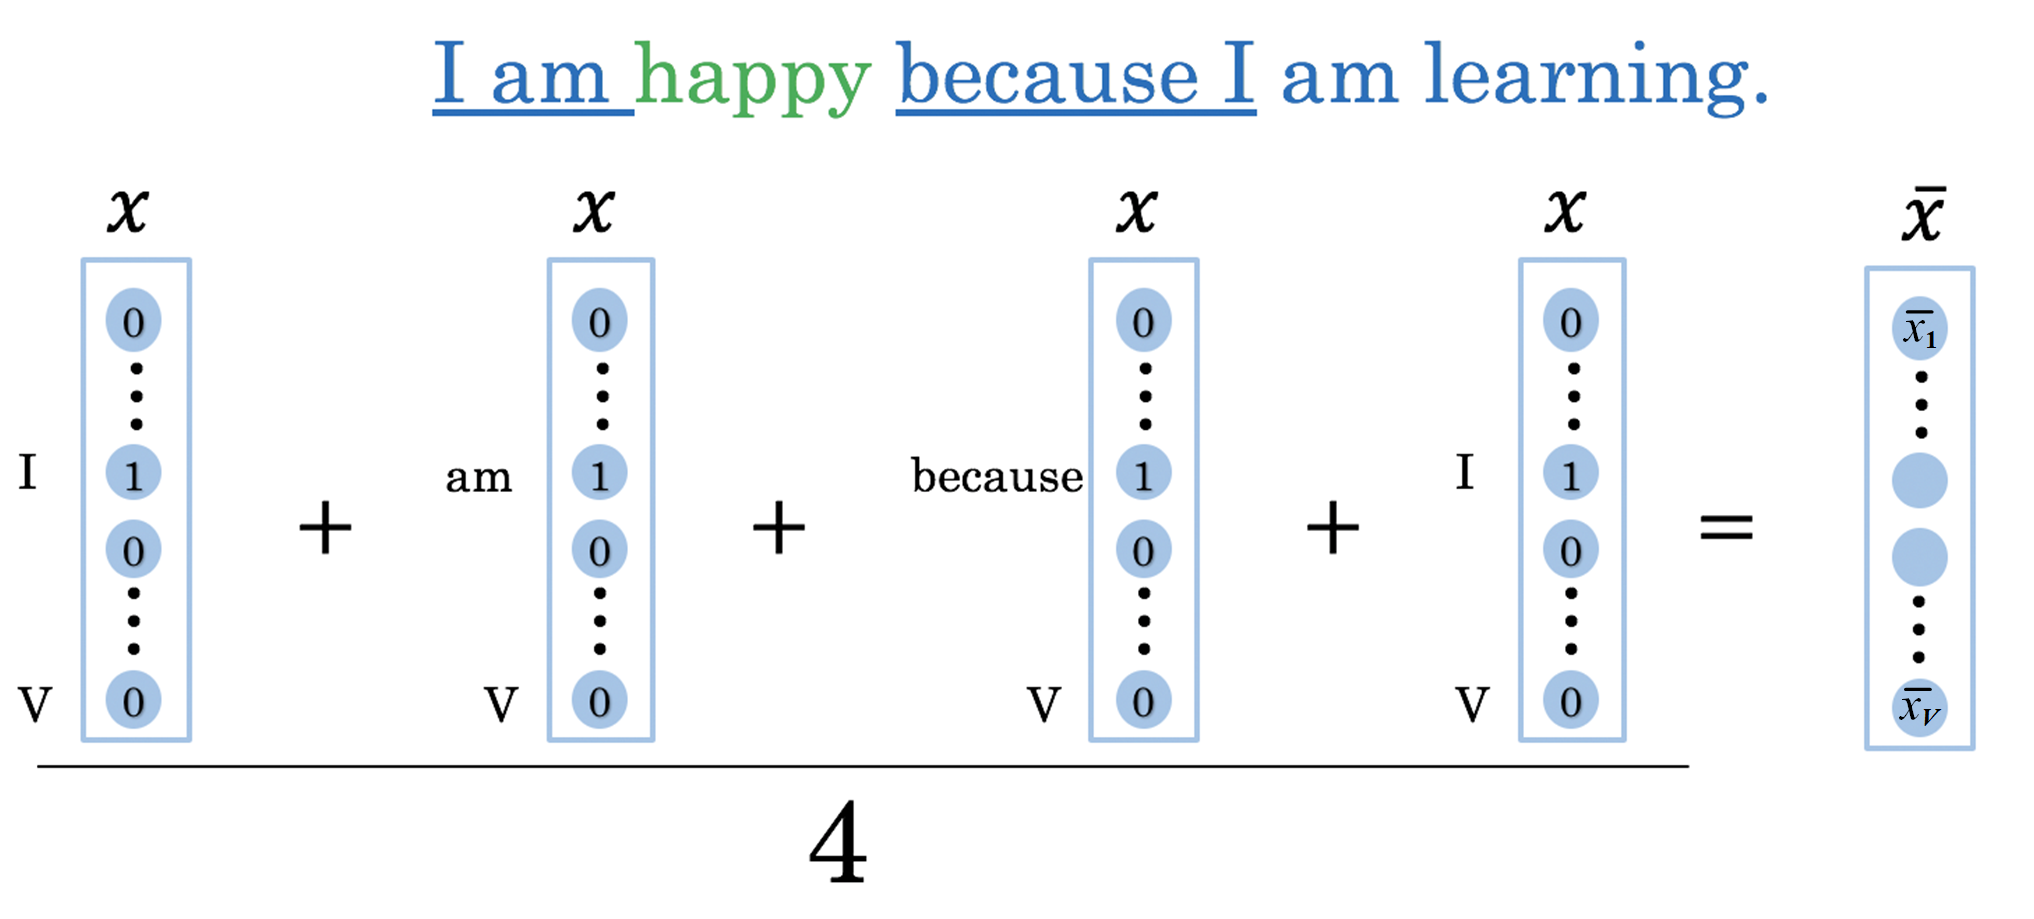

Figure 2
Once you have encoded all the context words, you can use $\bar x$ as the input to your model.

The architecture you will be implementing is as follows:

$$\begin{align}
 h = W_1 \  X + b_1  \tag{1} \\
 a = ReLU(h)  \tag{2} \\
 z = W_2 \  a + b_2   \tag{3} \\
 \hat y = softmax(z)   \tag{4} \\
\end{align}$$

In [23]:
!wget https://raw.githubusercontent.com/DrAlexSanz/NLP-SPEC-C2/master/W4/shakespeare.txt
!wget https://raw.githubusercontent.com/DrAlexSanz/NLP-SPEC-C2/master/W4/utils2.py

import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from collections import Counter
import numpy as np
import re
import matplotlib.pyplot as plt
from utils2 import sigmoid, get_batches, compute_pca, get_dict

--2020-11-11 22:21:05--  https://raw.githubusercontent.com/DrAlexSanz/NLP-SPEC-C2/master/W4/shakespeare.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 306996 (300K) [text/plain]
Saving to: ‘shakespeare.txt.3’

shakespeare.txt.3   100%[===================>] 299.80K  --.-KB/s    in 0.03s   

2020-11-11 22:21:05 (9.73 MB/s) - ‘shakespeare.txt.3’ saved [306996/306996]

--2020-11-11 22:21:05--  https://raw.githubusercontent.com/DrAlexSanz/NLP-SPEC-C2/master/W4/utils2.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3356 (3.3K) [text/plain

In [14]:
nltk.data.path.append(".") # Download sentence tokenizer

In [18]:
# Load, tokenize and process the data

with open("shakespeare.txt") as f:
    data = f.read()
print("Before preprocessing, see the second character")
print(data[500:600])
data = re.sub(r"[,.?;-]", ".", data) # This replaces any of the punctuation characters by a ".", see the result
print("After preprocessing, see the second character")
print(data[500:600])

Before preprocessing, see the second character
e? or may we cram
Within this wooden O the very casques
That did affright the air at Agincourt?
O, p
After preprocessing, see the second character
e. or may we cram
Within this wooden O the very casques
That did affright the air at Agincourt.
O. p


In [19]:
#Tokenize
data = nltk.word_tokenize(data)
data = [ch.lower() for ch in data if ch.isalpha() or ch == "."]

['o', 'for', 'a', 'muse', 'of', 'fire', '.', 'that', 'would', 'ascend', 'the', 'brightest', 'heaven', 'of', 'invention']


Size of vocabulary: 5772
Most frequent tokens: [('.', 9403), ('the', 1521), ('and', 1394), ('i', 1252), ('to', 1159), ('of', 1093), ('my', 857), ('that', 781), ('in', 770), ('you', 748), ('a', 742), ('is', 630), ('not', 559), ('for', 467), ('it', 460), ('with', 441), ('his', 434), ('but', 417), ('me', 417), ('your', 397)]


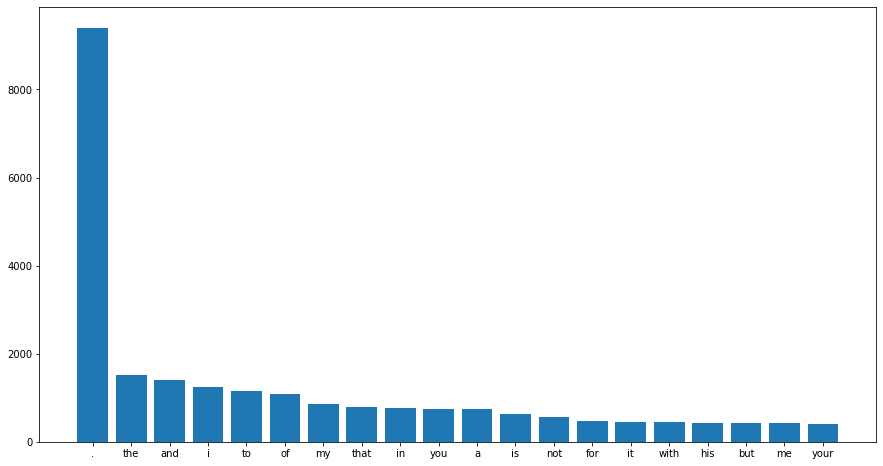

In [33]:
# Compute the frequency distribution of the words in the data

fdist = nltk.FreqDist(word for word in data)
print("Size of vocabulary:", len(fdist))
print("Most frequent tokens:", fdist.most_common(20))
x_val = [x[0] for x in fdist.most_common(20)]
y_val = [y[1] for y in fdist.most_common(20)]

plt.figure(figsize = (15, 8))

plt.bar(x_val, y_val); # Most of what I have is "."

I can see that the "." are skewing the data

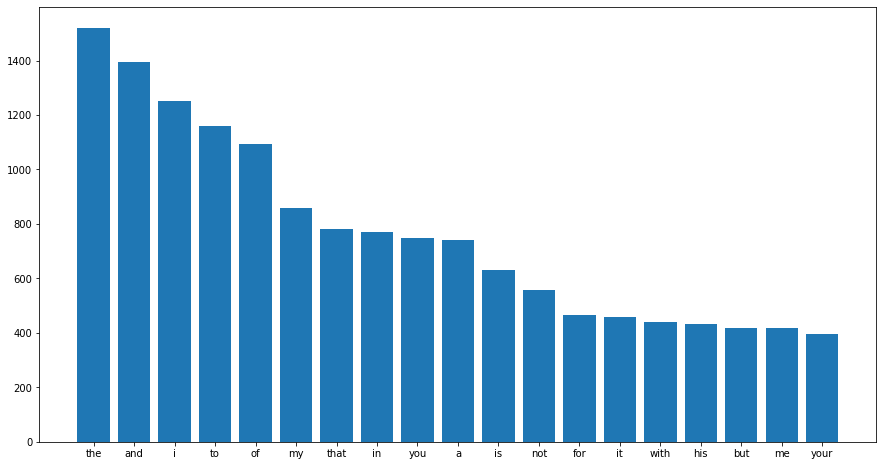

In [32]:
plt.figure(figsize = (15, 8))

plt.bar(x_val[1:], y_val[1:]); # Most of what I have is "."